In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


Dataset 

In [2]:
df=pd.read_csv(r'C:\Users\singh\Downloads\celebal\assignment3\Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
print('shape of the datset ',df.shape )
print('column of the dataset ',df.columns)

shape of the datset  (891, 12)
column of the dataset  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [10]:
# null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
# missing values and % of missing values

In [16]:
# missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
(df.isnull().sum()/len(df))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

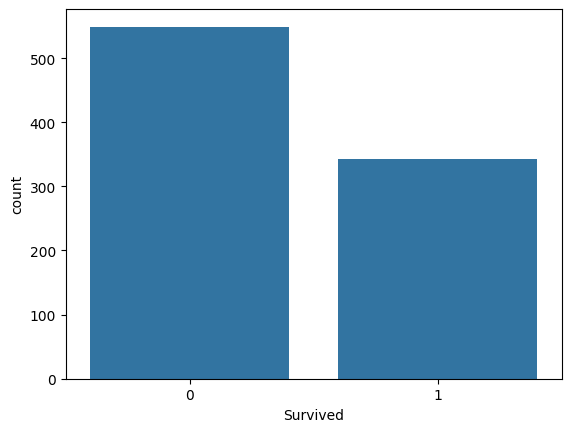

In [22]:
sns.countplot(x='Survived',data=df)
plt.show()

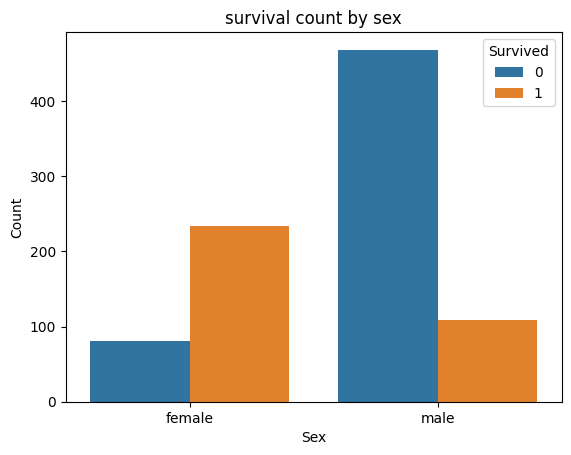

In [34]:
grouped=df.groupby(['Sex','Survived'])['Survived'].count().reset_index(name='Count')

# plot
sns.barplot(x='Sex',y='Count',hue='Survived',data=grouped)
plt.title('survival count by sex')
plt.show()

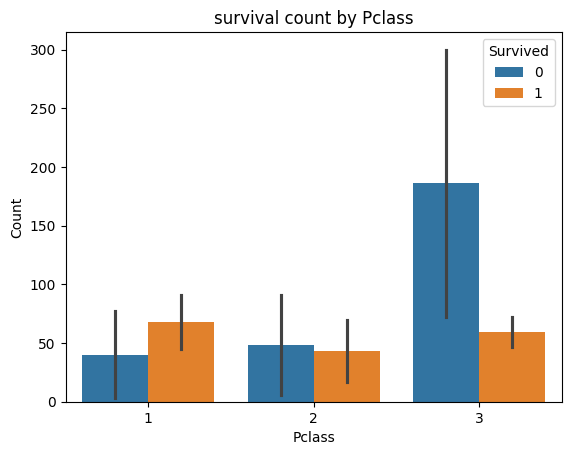

In [37]:
df.groupby(['Pclass','Survived'])['Survived'].count().reset_index(name='Count')
sns.barplot(x='Pclass',y='Count',hue='Survived',data=grouped)
plt.title('survival count by Pclass')
plt.show()


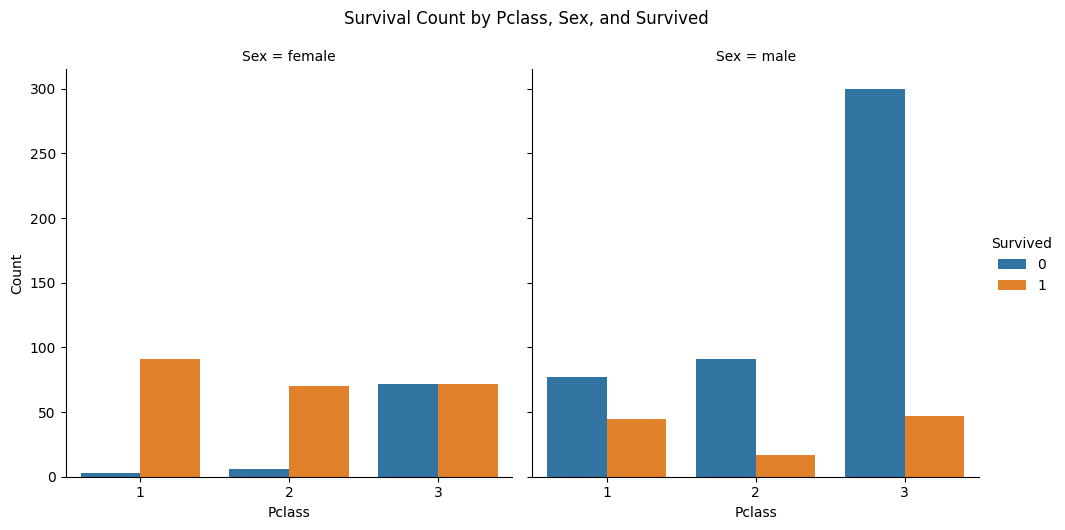

In [36]:
grouped = df.groupby(['Pclass', 'Survived', 'Sex'])['Survived'].count().reset_index(name='Count')

sns.catplot(
    data=grouped,
    x='Pclass',
    y='Count',
    hue='Survived',
    col='Sex',
    kind='bar'
)
plt.suptitle("Survival Count by Pclass, Sex, and Survived", y=1.05)
plt.show()


<Axes: >

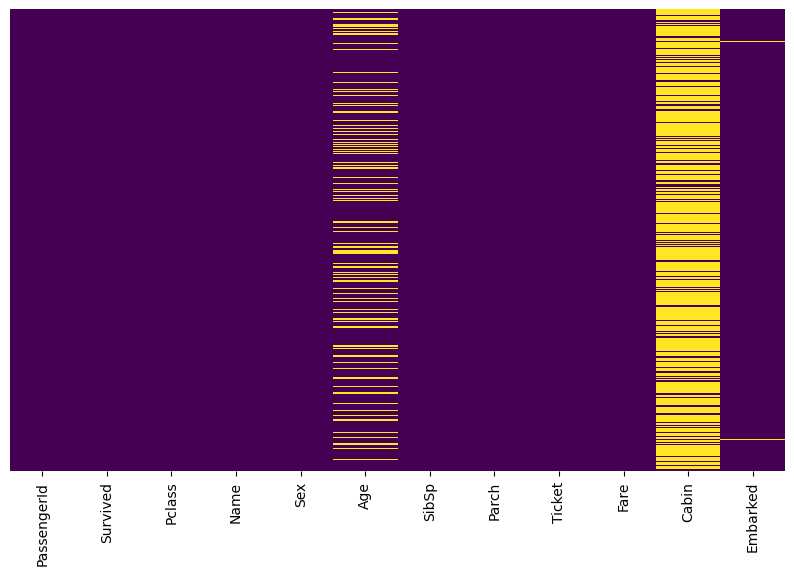

In [38]:
#  missing values in heapmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

In [39]:
from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestRegressor

In [40]:
df_copy=df.copy()

In [41]:
# seperating numericala and categorical data
numerical_cols = df_copy.select_dtypes(include=['number']).columns
categorical_cols =df_copy.select_dtypes(exclude=['number']).columns

In [42]:
imputer_num = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)

df_copy[numerical_cols] = imputer_num.fit_transform(df_copy[numerical_cols])

C:\Users\singh\AppData\Roaming\Python\Python312\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [45]:
# [0] from the first mode of result
for col in categorical_cols:
  df_copy[col]=df_copy[col].fillna(df_copy[col].mode()[0])

In [46]:
df_copy.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [47]:
# seperately

Univariate Analysis 

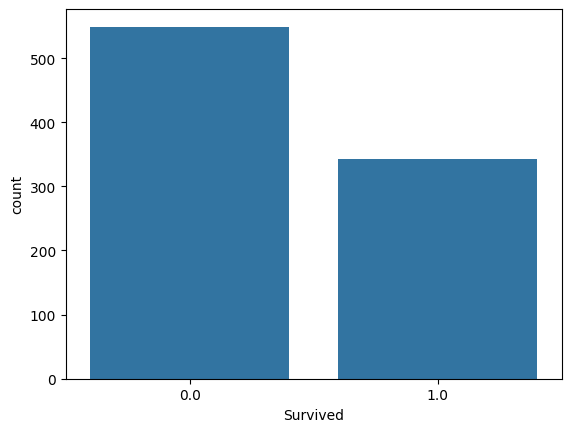

In [50]:
sns.countplot(x='Survived',data=df_copy)
plt.show()


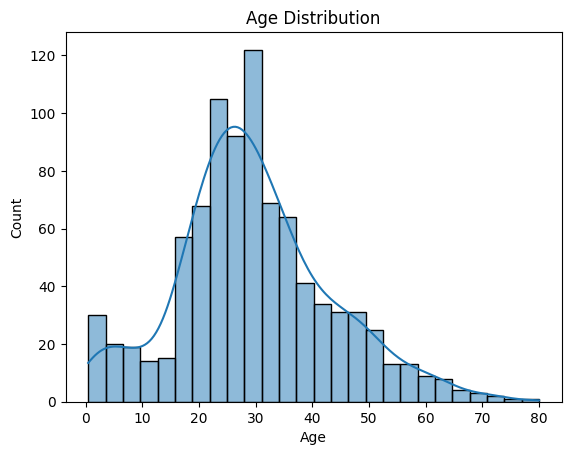

In [52]:
sns.histplot(x='Age', data=df_copy, kde=True)

plt.title('Age Distribution')

plt.show()

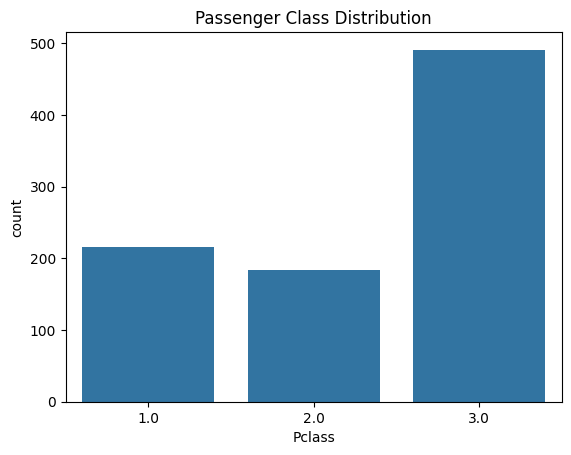

In [55]:
sns.countplot(x='Pclass', data=df_copy)

plt.title('Passenger Class Distribution')

plt.show()

Insights from Analysis 

Findings

Gender: Females had a higher survival rate compared to males.

Class: Passengers in 1st class had better chances of survival.

Age: Younger passengers (children) were more likely to survive.

In [58]:
# survival based on Embarkation Point


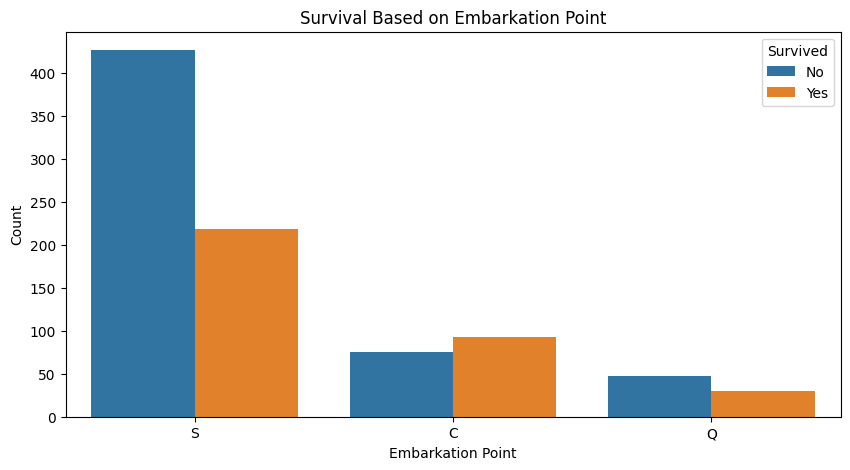

In [62]:
plt.figure(figsize=(10,5))
sns.countplot(x='Embarked',hue='Survived', data=df_copy)
plt.title('Survival Based on Embarkation Point')

plt.xlabel('Embarkation Point')

plt.ylabel('Count')

plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()



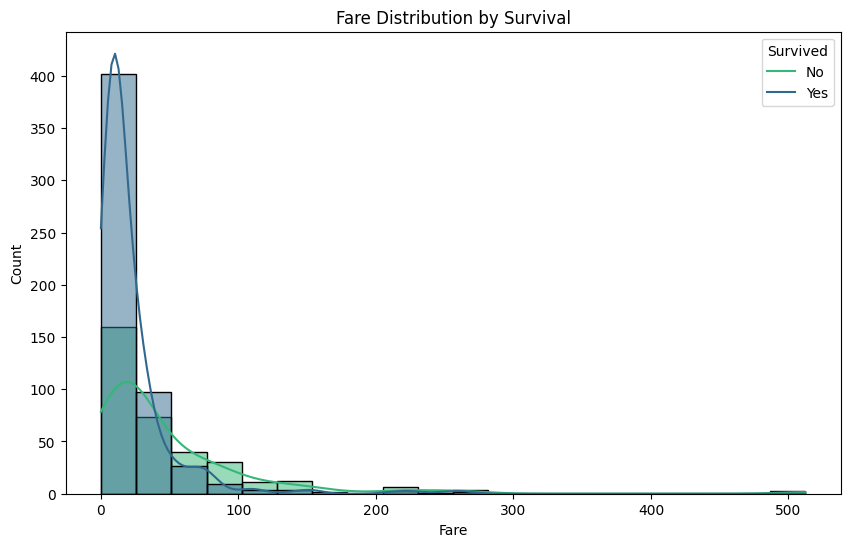

In [65]:
# survival based on fare
plt.figure(figsize=(10, 6))

sns.histplot(df_copy, x='Fare', hue='Survived', bins=20, kde=True, palette='viridis')

plt.title('Fare Distribution by Survival')

plt.xlabel('Fare')

plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

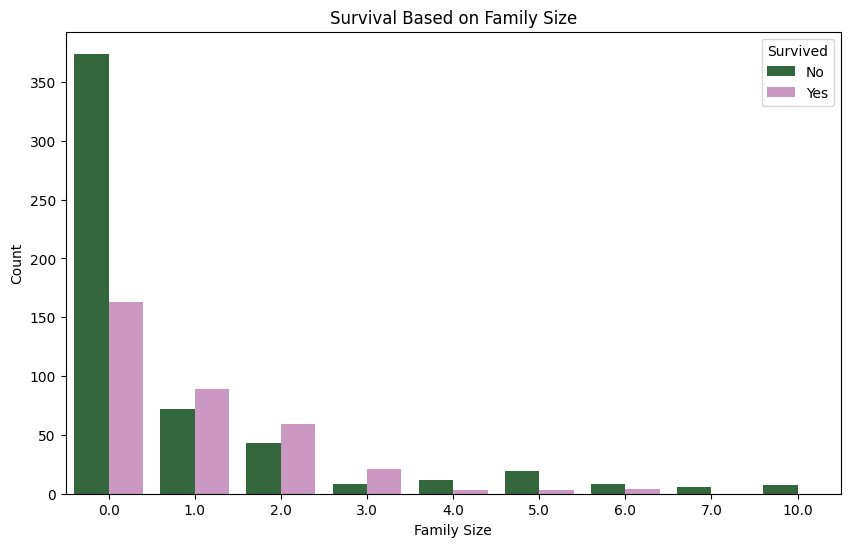

In [70]:
# Family Size Analysis

df_copy['family_size'] = df_copy['SibSp'] + df_copy['Parch']



plt.figure(figsize=(10, 6))

sns.countplot(x='family_size', hue='Survived', data=df_copy, palette='cubehelix')

plt.title('Survival Based on Family Size')

plt.xlabel('Family Size')

plt.ylabel('Count')

plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()


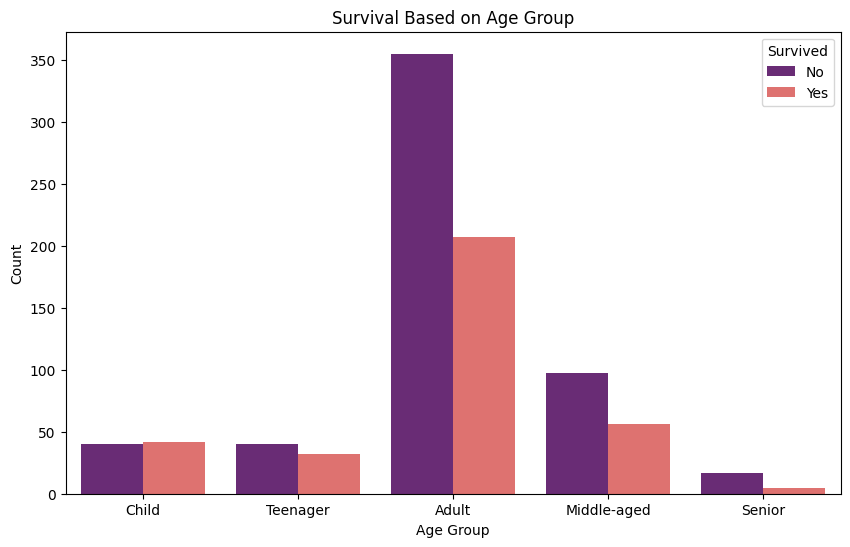

In [71]:
# Create Age Group

bins = [0, 12, 18, 40, 60, 80]

labels = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']

df_copy['age_group'] = pd.cut(df_copy['Age'], bins=bins, labels=labels)



# Visualize Survival by Age Group

plt.figure(figsize=(10, 6))

sns.countplot(x='age_group', hue='Survived', data=df_copy, palette='magma')

plt.title('Survival Based on Age Group')

plt.xlabel('Age Group')

plt.ylabel('Count')

plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

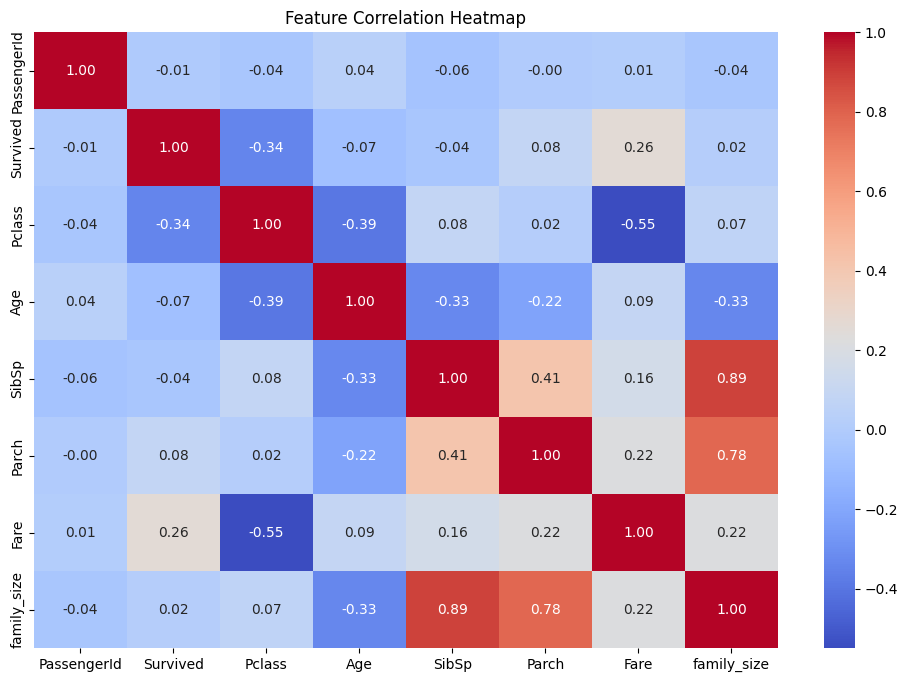

In [72]:
# Correlation heatmap

plt.figure(figsize=(12, 8))

# Select only numeric features for correlation calculation

numeric_features =df_copy.select_dtypes(include=np.number)

sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Feature Correlation Heatmap')

plt.show()